In [181]:
#import some usefull libraries:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox
from IPython.display import display,clear_output
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import cmath
np.seterr(divide='ignore', invalid='ignore')
print('start programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start programm:(15:36:17.880759)


In [182]:
#Breit-Wigner mass:
mass = 280

#proportionality factor of the numerator function:
alpha = 1

#orbital angular momentum of channel a:
la = 0

#masses of the decay products in channel a (two-body decay):
m1a = 139.57061
m2a = 139.57061

#coupling factor of channel a:
#gFaka = 0.3

#number of b channels that the resonance is coupled to:
number = 1

#orbital angular momentum of the channels b, insert them in the following manner: lb=[l_1,l_2,...,l_number]:
lb = 0

#coupling factor of the channels b, [g_1,g_2,...,g_number]:
gFakb = 0

#masses of the decay products in the channels b, use e.g. m1b = [m1_1,m1_2,...,m1_number]:
m1b = 493.677
m2b = 493.677

In [183]:
def q(s, m1, m2):
    return (np.sqrt(s**2 + m1**4 + m2**4 - 2*s*m1**2 - 2*m1**2*m2**2 - 2*m1**2*s))/(2*np.sqrt(s))

In [184]:
#Blatt-Weisskopf form factors:
def weiss(z,la):
    if la != 0:
        if la ==1:
            return np.sqrt(1/(1+z**2))
        else:
            return np.sqrt(1/(9+ 3*z**2 + z**4))
    else:
        return 1

In [185]:
def smallnum(s,la,m1,m2):
    #q0=abs(q(s,m1,m2))
    q0 =1
    return (q(s,m1,m2)/q0)**la*weiss(q(s,m1,m2)/q0,la)

In [186]:
def rho(s,m1,m2):
    return 2*q(s,m1,m2)/(16*np.pi*np.sqrt(s))

In [187]:
def width2(s,mass,lb,m1,m2,gFak):
   sum = 0.
   for i in range(0,2):
       sum += gFak[i]**2*rho(s,m1[i],m2[i])*smallnum(s,lb[i],m1[i],m2[i])**2
   return 1/mass*sum

In [188]:
def width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b):
   res = gFaka**2*rho(s,m1a,m2a)*smallnum(s,la,m1a,m2a)**2 + gFakb**2*rho(s,m1b,m2b)*smallnum(s,lb,m1b,m2b)**2
   return 1/mass*res

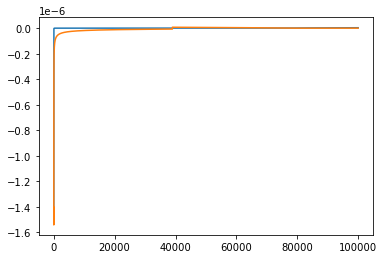

In [189]:
gFaka = 0.01
lowlim = 0
uplim = 100000
imag = 1

s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
plt.plot(s.real,width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b).real)
plt.plot(s.real,width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b).imag)

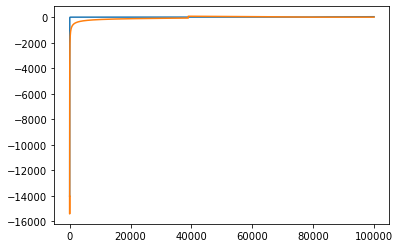

In [190]:
gFaka = 1000
lowlim = 0
uplim = 100000
imag = 1

s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
plt.plot(s.real,width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b).real)
plt.plot(s.real,width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b).imag)

In [191]:
s=mass**2-1j*gFaka**2*1/(32*np.pi)*1/s*np.sqrt(s**2+m1a**4+m2a**4-2*s*m1a**2-2*m1a**2*m2a**2-2*s*m1a**2)


In [192]:
#numerator function
def num(s,alpha,la,m1,m2,gFak):
    return alpha*gFak*smallnum(s,la,m1,m2)

[1, 0]


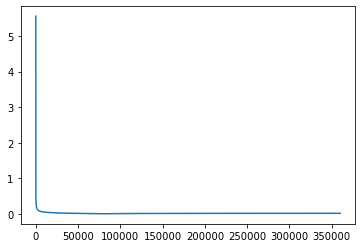

In [193]:
gFaka =1
gFak = [gFaka,gFakb]
print(gFak)
m1 = [m1a,m1b]
m2 = [m2a,m2b]
li = [la,lb]
lowlim = 0
uplim = 360000
imag = 1

s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
#s = 1 + 1j*1
def func(s):
    sum =0.
    for i in range(0,2):
        sum += gFak[i]**2*rho(s,m1[i],m2[i])*smallnum(s,li[i],m1[i],m2[i])**2
    return sum
#print(sum)
#print(width(s,mass,li,m1,m2,gFak))
plt.plot(s.real,abs(func(s)))
#-0.4467661168687124-1.078569242648955j

[0.1, 0]
[-1.40243866e-04-1.40242066e-04j -6.38237310e-05-1.54081320e-04j
 -3.04733961e-05-1.29083673e-04j ...  6.28936281e-07+2.41300245e-13j
  6.28936523e-07+2.41298812e-13j  6.28936764e-07+2.41297379e-13j]


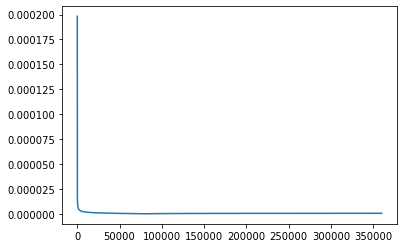

In [194]:
gFaka =0.1
gFak = [gFaka,gFakb]
print(gFak)
m1 = [m1a,m1b]
m2 = [m2a,m2b]
li = [la,lb]
lowlim = 0
uplim = 360000
imag = 1
s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
print(width2(s,mass,li,m1,m2,gFak))
plt.plot(s.real,abs(width2(s,mass,li,m1,m2,gFak)))

In [195]:
gFaka=0.5
def amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka,gFakb]
    m1 = [m1a,m1b]
    m2 = [m2a,m2b]
    li = [la,lb]
    return num(s,alpha,la,m1a,m2a,gFaka) /  (mass**2-s-1j*(mass*width(s,mass,li,m1,m2,gFak)))

s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
print(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
plt.plot(s.real,abs(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)**2))

TypeError: width() missing 4 required positional arguments: 'gFakb', 'lb', 'm1b', and 'm2b'

In [ ]:
gFaka=0.1
def amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka,gFakb]
    m1 = [m1a,m1b]
    m2 = [m2a,m2b]
    li = [la,lb]
    return num(s,alpha,la,m1a,m2a,gFaka) /  (mass**2-s-1j*(mass*width(s,mass,li,m1,m2,gFak)))

s = np.array([complex(i,imag) for i in range(lowlim, uplim)])
print(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
plt.plot(s.real,abs(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)**2))

In [ ]:
sum2 = 3
sum2 +=5
print(sum2)


In [ ]:
mass = 280
gFaka = 0.9
m1a = 139.57061
m2a = 139.57061
x=y=np.linspace(78000,79000,num=1000)
var = 0
count =0
for i in x:
    for k in y:
        s=complex(i,k)
        qa = np.sqrt(s**2+m1a**4+m2a**4-2*s*m1a**2-2*m1a**2*m2a**2-2*s*m1a**2)/(2*np.sqrt(s))
        if (mass**2-s-(gFaka**2*qa/(16*np.pi*np.sqrt(s))*1j)) < 0.000001:
            var = 1
            if count > 1:
                break
            print('Polstelle bei ',s)
            print(mass**2-s)
            print(gFaka**2*qa/(16*np.pi*np.sqrt(s))*1j)
            print(mass**2-s-(gFaka**2*qa/(16*np.pi*np.sqrt(s))*1j))
            count += 1
            
if var == 0:
    print('keine Polstelle gefunden')
def func2(s,gFaka):
    qa = np.sqrt(s**2+m1a**4+m2a**4-2*s*m1a**2-2*m1a**2*m2a**2-2*s*m1a**2)/(2*np.sqrt(s))
    return gFaka**2*qa/(16*np.pi*np.sqrt(s))
a=b=np.linspace(78000,79000,num=1000)
for i in a:
    for k in b:
        s=complex(i,k)
        
        
plt.plot(s.real,abs(func2(s,0.1)))
plt.show()
#plt.plot(s.real,func2(s,0.9)
#(-0.4004004003945738-78000j)
#(-0.0007957496075323039+0.001930935921755207j)
#(-0.3996046507870415-78000.00193093592j)

In [ ]:
mass = 280
gFaka = 50
m1a = 139.57061
m2a = 139.57061
la=0
gFakb = 0
lb =0
m1b=493.677
m2b=493.677
x=y=np.linspace(78000,79000,num=1000)
var = 0
count =0

def q(s, m1a, m2a):
    return np.sqrt(s**2+m1a**4+m2a**4-2*s*m1a**2-2*m1a**2*m2a**2-2*s*m1a**2)/(2*np.sqrt(s))

def weiss(z,la):
    if la != 0:
        if la ==1:
            return np.sqrt(1/(1+z**2))
        else:
            return np.sqrt(1/(9+ 3*z**2 + z**4))
    else:
        return 1

def smallnum(s,la,m1,m2):
    #q0=abs(q(s,m1,m2))
    q0 =1
    return (q(s,m1,m2)/q0)**la*weiss(q(s,m1,m2)/q0,la)


def rho(s,m1,m2):
    return 2*q(s,m1,m2)/(16*np.pi*np.sqrt(s))


def width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b):
   res = gFaka**2*rho(s,m1a,m2a)*smallnum(s,la,m1a,m2a)**2 + gFakb**2*rho(s,m1b,m2b)*smallnum(s,lb,m1b,m2b)**2
   return 1/mass*res

for i in x:
    for k in y:
        s=complex(i,k)
        if (mass**2-s-1j*mass*width(s,mass,gFaka,la,m1a,m2a,gFakb,lb,m1b,m2b)) < 0.0000001:
            var = 1
            if count > 5:
                break
            print('Polstelle bei ',s)
            count += 1
            
if var == 0:
    print('keine Polstelle gefunden')
    

In [ ]:
x=complex(1,5)
print(x)
y =x*1j
print(y)

In [ ]:
x=[1,2,3]
y=np.sqrt(x)
print(y)